# Tarea 3 Machine Learning - Métodos no Lineales

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

## 1. Small Circle inside Large Circle

Experimentación sobre un problema de clasificación *linealmente inseparable* usando métodos lineales y no lineales.

#### (a) Creación del dataset artificial

La siguiente función producirá, por defecto, 1000 datos de entrenamiento y 1000 de pruebas. El nivel de ruido será, por defecto, del 5%.

In [1]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test


Y se define una función de visualización de frontera de decisión de los modelos.

In [116]:
import matplotlib.pyplot as plt

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool', label='Entrenamiento')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='gray', label='Prueba')
    XX, YY = np.mgrid[-2:2:400j, -2:2:400j]
    if model_type == 'tree':
        Z = 1-clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])

    plt.show()

#### (b) Demostración experimental de una red neuronal de una única neurona no logra resolver satisfactoriamente el problema de clasificación.

Primero, se genera el dataset artificial, con 1000 datos de entrenamiento, 1000 de pruebas, y un 5% de ruido.

In [4]:
X_train, y_train, X_test, y_test = do_circles()

Luego, se define, entrena y evalúa el modelo, usando para esto la API que provee la librería *Keras*.

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h=1

modelo_1b = Sequential()
modelo_1b.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_1b.add(Dense(n_h, init='uniform', activation='sigmoid'))
modelo_1b.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
acc_1b = modelo_1b.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,
                       batch_size=100,verbose=1).history

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':


Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s - loss: 0.6935 - acc: 0.5090 - val_loss: 0.6929 - val_acc: 0.5070
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.6940 - acc: 0.4650 - val_loss: 0.6934 - val_acc: 0.4930
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.6933 - acc: 0.4980 - val_loss: 0.6914 - val_acc: 0.6640
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.6893 - acc: 0.5640 - val_loss: 0.6874 - val_acc: 0.4520
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.6817 - acc: 0.5690 - val_loss: 0.6780 - val_acc: 0.6530
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.6636 - acc: 0.6590 - val_loss: 0.6601 - val_acc: 0.4950
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.6377 - acc: 0.6040 - val_loss: 0.6360 - val_acc: 0.6520
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.6113 - a

Y se observa la evolución del desempeño del modelo con cada *epoch* de entrenamiento.

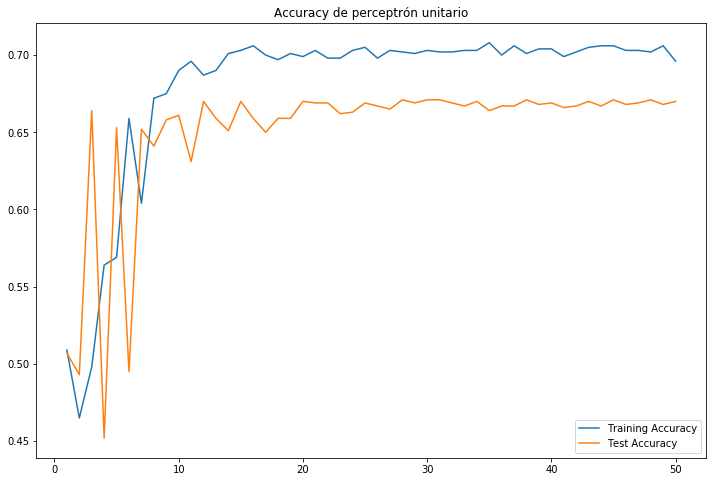

In [65]:
plt.figure(figsize=(12,8))
plt.title("Accuracy de perceptrón unitario")
plt.plot(np.linspace(1,50), acc_1b['acc'], label="Training Accuracy")
plt.plot(np.linspace(1,50), acc_1b['val_acc'], label="Test Accuracy")
plt.legend(loc='lower right')
plt.show()

Donde, después de los 50 *epochs*, se alcanza un *accuracy* de entrenamiento y de prueba del 69.6% y 67.0%, respectivamente.

Finalmente, se observa de manera gráfica el criterio de clasificación que determinó el modelo.

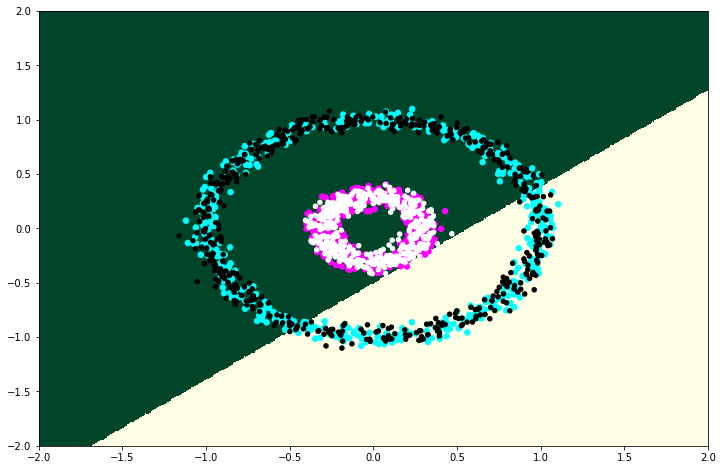

In [66]:
plot_classifier(modelo_1b, X_train, y_train, X_test, y_test, 'ann')

Conjunto de entrenamiento: Magenta (clase 0) y Cian (clase 1)

Conjunto de prueba: Blanco (clase 0) y Negro (clase 1)

Frontera de decisión del modelo: Verde Oscuro (clase 0) y Amarillo Claro (clase 1)

El modelo entrenado es un perceptrón de entrada bidimensional y activación *ReLU* (**Preguntar al Mena por qué es necesaria esta activación en la capa de entrada**), y salida unidimensional con activación sigmoidal, cuya región de decisión queda linealmente separada para todos los $x$ del espacio que evalúen más o menos que $0.5$:

$ Si:\ \sigma (x) < 0.5 \implies x \in Region\ Amarilla $

$ Si:\ \sigma (x) \geq 0.5 \implies x \in Region\ Verde $

Notar que, durante el entrenamiento del modelo, no se superó el 71% de exactitud en el mismo conjunto de datos, y probablemente no mejoraría ni empeoraría si el entrenamiento continuara. A continuación, se aumentará a 100 la cantidad de epochs de entrenamiento, y se usarán distintas funciones de activación de salida.

In [78]:
activaciones = ['linear', 'relu', 'softplus', 'sigmoid', 'tanh']

accuracies = {}

for activacion in activaciones:
    n_h=1
    modelo_1b_2 = Sequential()
    modelo_1b_2.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    modelo_1b_2.add(Dense(n_h, init='uniform', activation=activacion))
    modelo_1b_2.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    acc_1b_2 = modelo_1b_2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,
                       batch_size=100,verbose=0).history
    accuracies[activacion] = acc_1b_2

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="softplus", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: 

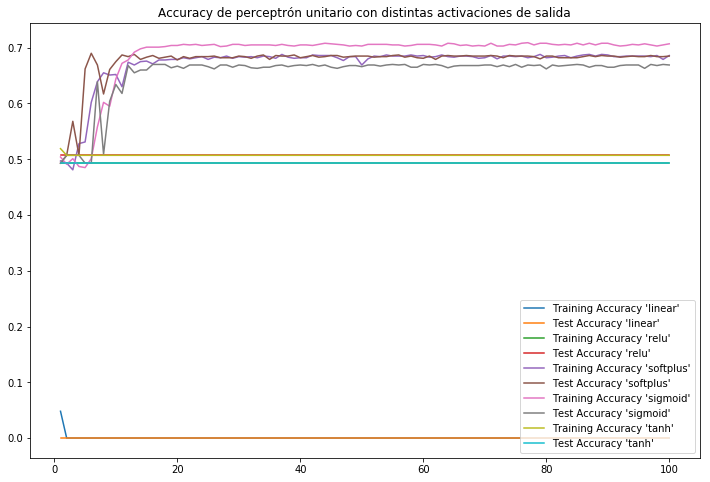

In [91]:
plt.figure(figsize=(12,8))
plt.title("Accuracy de perceptrón unitario con distintas activaciones de salida")
plt.plot(np.linspace(1,100,100), accuracies['linear']['acc'], label="Training Accuracy 'linear'")
plt.plot(np.linspace(1,100,100), accuracies['linear']['val_acc'], label="Test Accuracy 'linear'")
plt.plot(np.linspace(1,100,100), accuracies['relu']['acc'], label="Training Accuracy 'relu'")
plt.plot(np.linspace(1,100,100), accuracies['relu']['val_acc'], label="Test Accuracy 'relu'")
plt.plot(np.linspace(1,100,100), accuracies['softplus']['acc'], label="Training Accuracy 'softplus'")
plt.plot(np.linspace(1,100,100), accuracies['softplus']['val_acc'], label="Test Accuracy 'softplus'")
plt.plot(np.linspace(1,100,100), accuracies['sigmoid']['acc'], label="Training Accuracy 'sigmoid'")
plt.plot(np.linspace(1,100,100), accuracies['sigmoid']['val_acc'], label="Test Accuracy 'sigmoid'")
plt.plot(np.linspace(1,100,100), accuracies['tanh']['acc'], label="Training Accuracy 'tanh'")
plt.plot(np.linspace(1,100,100), accuracies['tanh']['val_acc'], label="Test Accuracy 'tanh'")
plt.legend(loc='lower right')
plt.show()

Al usar distintas activaciones de salida, el rendimiento o bien no mejora y se queda en el ~50% de accuracy, o bien cae a 0% de inmediato. Softplus es la única que se asemeja a sigmoid en el rendimiento:

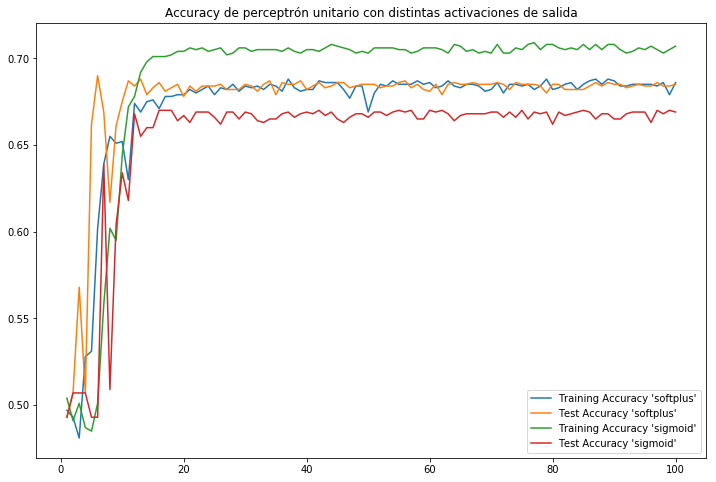

In [92]:
plt.figure(figsize=(12,8))
plt.title("Accuracy de perceptrón unitario con distintas activaciones de salida")
plt.plot(np.linspace(1,100,100), accuracies['softplus']['acc'], label="Training Accuracy 'softplus'")
plt.plot(np.linspace(1,100,100), accuracies['softplus']['val_acc'], label="Test Accuracy 'softplus'")
plt.plot(np.linspace(1,100,100), accuracies['sigmoid']['acc'], label="Training Accuracy 'sigmoid'")
plt.plot(np.linspace(1,100,100), accuracies['sigmoid']['val_acc'], label="Test Accuracy 'sigmoid'")

plt.legend(loc='lower right')
plt.show()

Es interesante ver que la calidad de clasificación al usar softplus no cambia entre los conjuntos de entrenamiento y prueba, mientras que con sigmoid esta diferencia es de aproximadamente un 4%. Más aún, la calidad de softplus es mejor que sigmoid en cuanto a clasificaciones de prueba.

Softplus se define de la siguiente forma:

\begin{equation}
softplus(x) = ln(1+e^x)
\end{equation}

Y por lo tanto, la frontera de decisión del modelo debiera ser cuando $softplus$ evalúa más o menos que 0.5

In [103]:
n_h=1

modelo_1b_3 = Sequential()
modelo_1b_3.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_1b_3.add(Dense(n_h, init='uniform', activation='softplus'))
modelo_1b_3.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
acc_1b_3 = modelo_1b_3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,
                       batch_size=100,verbose=0).history

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="softplus", kernel_initializer="uniform")`
  """


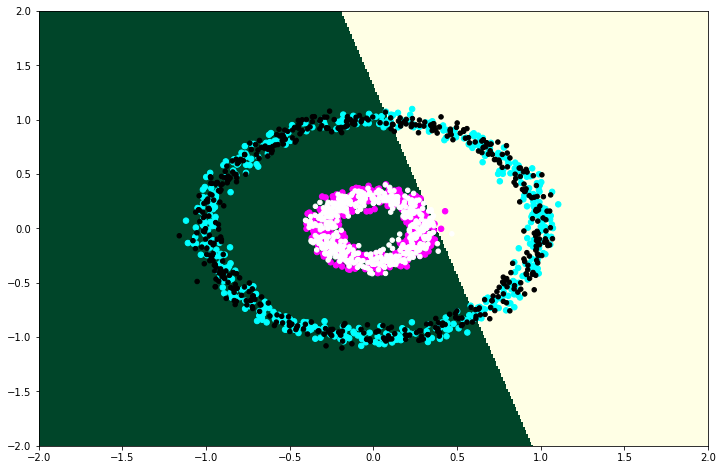

In [104]:
plot_classifier(modelo_1b_3, X_train, y_train, X_test, y_test, 'ann')

Sin embargo, el criterio de decisión sigue siendo lineal, por lo que este no se ve afectado por la función de activación de salida. Esto es razonable, ya que no se está complejizando o simplificando el modelo en cuanto a cantidad de parámetros.

Por simple análisis, se afirma que el tamaño de los *batches* ni la cantidad de *epochs* tampoco cambian la geometría del criterio de decisión, puesto que no agregan ni quitan parámetros al modelo.

El valor que la tasa de aprendizaje tome tampoco afecta a la complejidad del modelo.

Por último, ni la medida de pérdida, ni el método de aprendizaje afectan a la complejidad del modelo.

Por lo tanto, si las características recién mencionadas son las únicas que se pueden ajustar, entonces el modelo no puede mejorar más allá de lo ya alcanzado: el problema es insoluble con un modelo que consiste sólo de una neurona, puesto que es de naturaleza no lineal, mientras que el modelo no lo es.

#### (c) Demostración experimental de que una red neuronal de una capa oculta puede resolver el problema anterior.

Entrenamiento con:

>$N_h \in \{2,4,8,16,32\} $
>
>Activación de entrada: ReLU
>
>Activación de salida: sigmoid
>
>loss: binary_crossentropy
>
>Optimizador: SGD con lr=1
>
>Epochs=50
>
>batch_size=100


Frontera de decision con 2 neuronas:


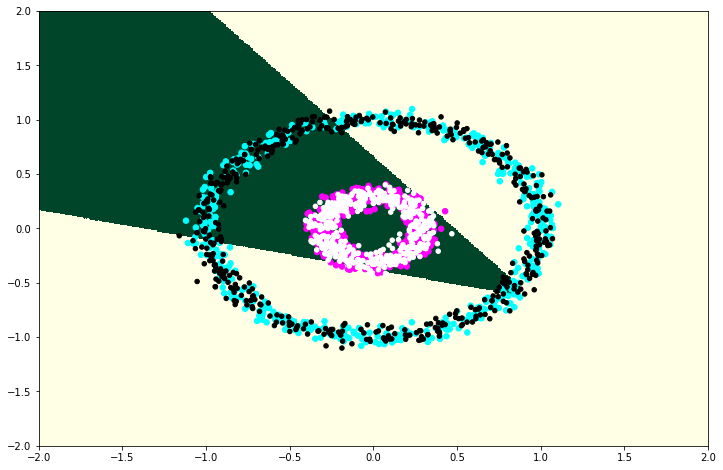


Frontera de decision con 4 neuronas:


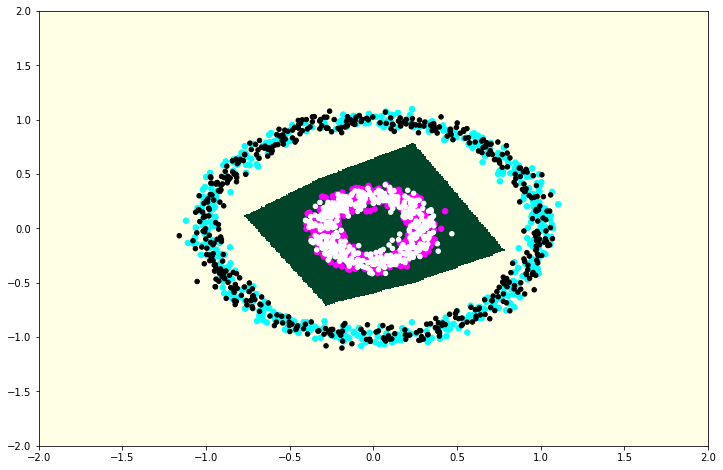


Frontera de decision con 8 neuronas:


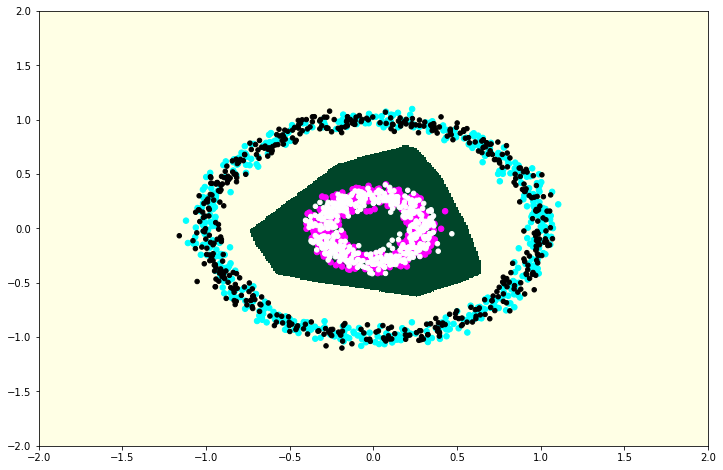


Frontera de decision con 16 neuronas:


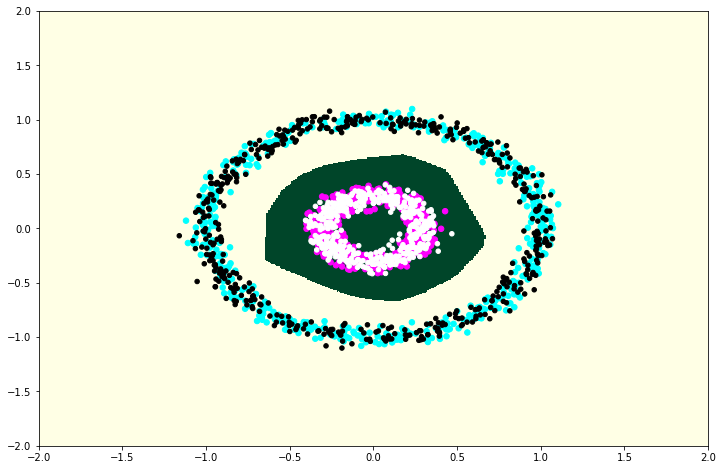


Frontera de decision con 32 neuronas:


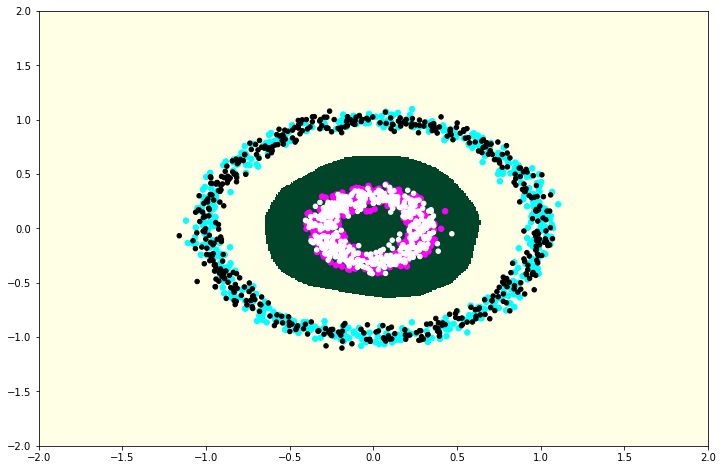

In [106]:
cantidad_neuronas = [2,4,8,16,32]

accuracies_c = {}

for n_h in cantidad_neuronas:
    modelo_1c = Sequential()
    modelo_1c.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    modelo_1c.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    modelo_1c.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    acc_1c = modelo_1c.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,
                       batch_size=100,verbose=0).history
    accuracies_c[n_h] = acc_1c
    print()
    print("Frontera de decision con "+str(n_h)+" neuronas:")
    plot_classifier(modelo_1c, X_train, y_train, X_test, y_test, 'ann')

A medida que se aumenta la cantidad de neuronas de la capa oculta, la frontera de decisión del modelo se va volviendo cada vez más suave y ajustada. Si se recuerda a qué clase pertenece cada color, se observa visualmente que ningún dato queda mal clasificado a partir del uso de 4 neuronas.

A continuación se grafica el *accuracy* alcanzado en función de la cantidad de neuronas $N_h$.

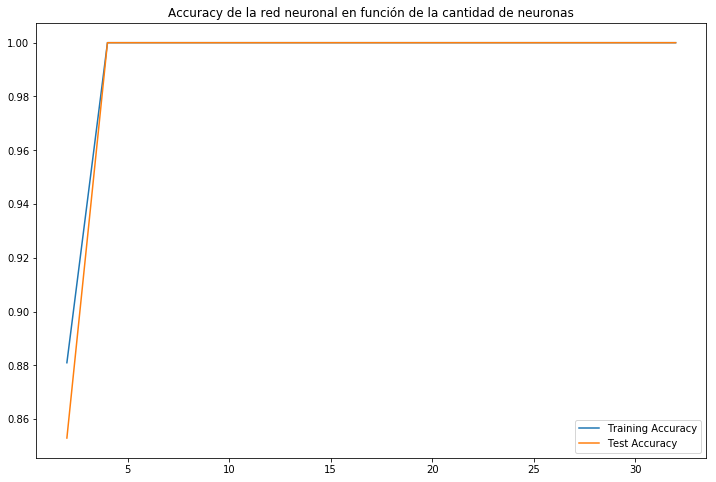

In [110]:
plt.figure(figsize=(12,8))
plt.title("Accuracy de la red neuronal en función de la cantidad de neuronas")
plt.plot(
    [2,4,8,16,32],
    [
        accuracies_c[2]['acc'][-1],
        accuracies_c[4]['acc'][-1],
        accuracies_c[8]['acc'][-1],
        accuracies_c[16]['acc'][-1],
        accuracies_c[32]['acc'][-1],
    ],
    label="Training Accuracy"
)
plt.plot(
    [2,4,8,16,32],
    [
        accuracies_c[2]['val_acc'][-1],
        accuracies_c[4]['val_acc'][-1],
        accuracies_c[8]['val_acc'][-1],
        accuracies_c[16]['val_acc'][-1],
        accuracies_c[32]['val_acc'][-1],
    ],
    label="Test Accuracy"
)
plt.legend(loc='lower right')
plt.show()

Como se observó, a partir de las 4 neuronas, el modelo logra una exactitud del 100% tanto en el entrenamento como en las pruebas. El problema pudo ser resuelto de forma satisfactoria usando más atributos (neuronas), lo que permitió al modelo de red neuronal determinar un critero de decisión más complejo (no lineal), obteniendo los resultados buscados.

#### (d) Demostración experimental de que un *stump* (árbol de clasificación de 1 nivel) no puede resolver el problema anterior de manera satisfactoria.

Test Accuracy = 0.670000
Max. Produndidad = 1


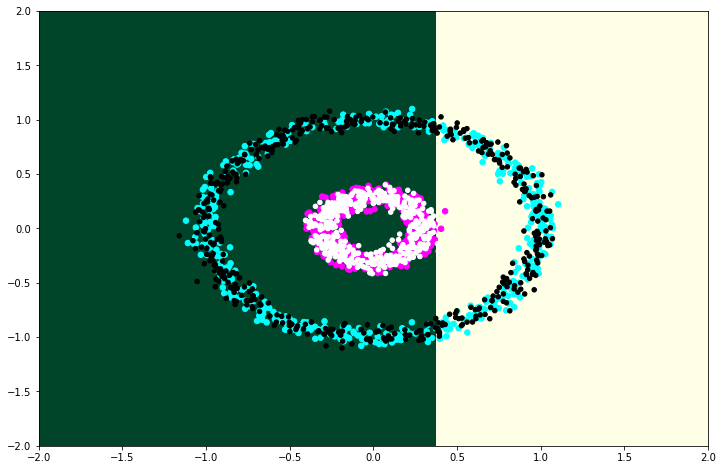

In [117]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf_1d=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf_1d.fit(X_train,y_train)
acc_test_1d = clf_1d.score(X_test,y_test)

print ("Test Accuracy = %f"%acc_test_1d)
print ("Max. Produndidad =", clf_1d.tree_.max_depth)

plot_classifier(clf_1d,X_train,y_train,X_test,y_test,'tree')

Respecto del caso de la red de una sola neurona, la frontera de clasificación que un *stump* logra es aún más limitada, pues ésta sólo puede ser horizontal o vertical (no diagonal), ya que sólo posee un atributo. Sin embargo, dada las condiciones específicas de este problema, se observa que el *accuracy* de pruebas es de 67%, muy parecido a lo logrado con la neurona unitaria.

A continuación, se intentará mejorar el rendimiento del árbol, modificando sus parámetros pero manteniendo la profundidad en 1. Se probarán los criterios de corte de Gini y Entropy, y también los *splitters* `random` y `best`. Como medida adicional, se usará el parámetro `presort=True` para acelerar el entrenamiento.



Criterio: gini
Split: random
Test Accuracy = 0.679000
Max. Produndidad = 1


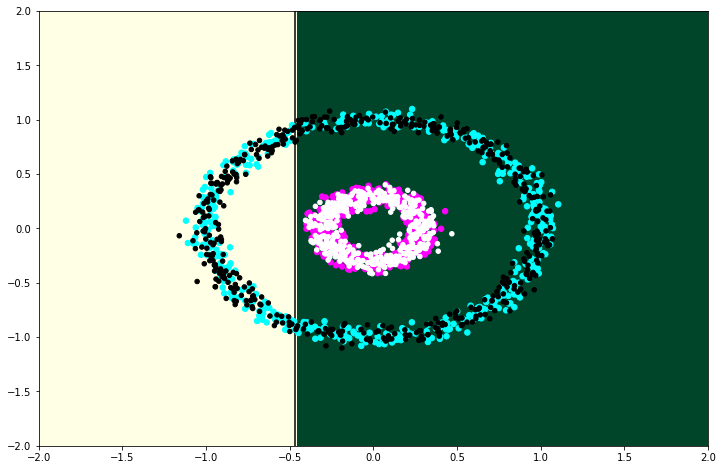

Criterio: gini
Split: best
Test Accuracy = 0.670000
Max. Produndidad = 1


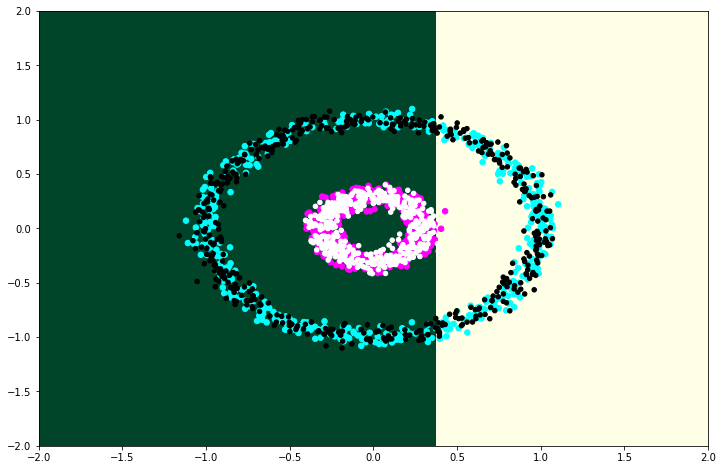

Criterio: entropy
Split: random
Test Accuracy = 0.679000
Max. Produndidad = 1


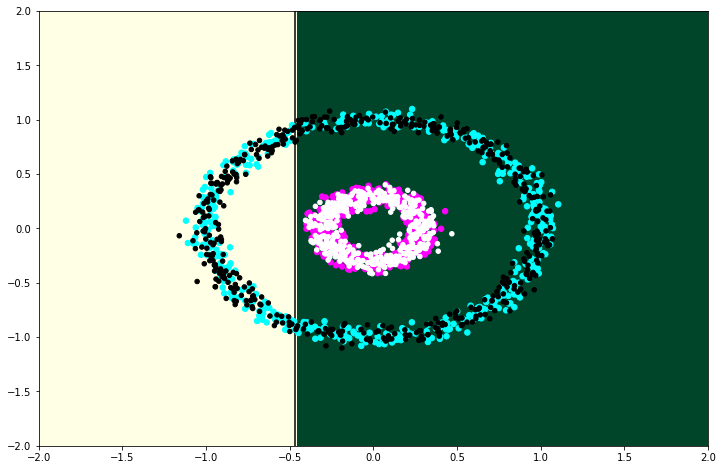

Criterio: entropy
Split: best
Test Accuracy = 0.658000
Max. Produndidad = 1


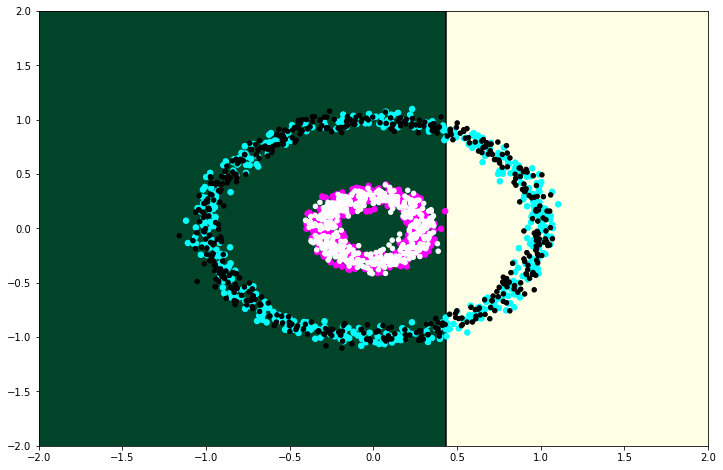

In [118]:
for criterio in ["gini", "entropy"]:
    for split in ["random", "best"]:
        clf_1d_2=Tree(criterion=criterio,splitter=split,random_state=0,max_depth=1,presort=True)
        clf_1d_2.fit(X_train,y_train)
        acc_test_1d_2 = clf_1d_2.score(X_test,y_test)

        print ("Criterio:", criterio)
        print ("Split:", split)
        print ("Test Accuracy = %f" % acc_test_1d_2)
        print ("Max. Produndidad =", clf_1d_2.tree_.max_depth)

        plot_classifier(clf_1d_2,X_train,y_train,X_test,y_test,'tree')

La exactitud de los cuatro modelos resultantes está entre el 65.8% y el 67.9%, siendo el mejor el que tiene criterio de Entropy y `splitter=random`, estando al nivel de rendimiento de la neurona unitaria. Sin embargo, en esencia, todos los modelos rinden al mismo nivel, no habiendo mejora satisfactoria en el criterio de clasificación. Al igual como se explicó en el ítem (b), cambiar el criterio y el *split* no aportan con nuevos parámetros al modelo, por lo cual, sigue siendo imposible para el árbol hacer más de una división de regiones.

Nota: no se tocó el parámetro `random_state` pues éste sólo cambia el punto de partida desde donde se busca el mejor *split* de regiones, y no aporta con mayor complejidad al modelo.

#### (e) Demostración experimental de que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema anterior.

Se usará un árbol con los mismos hiperparámetros que en el ítem anterior: `criterion='gini'` y `splitter='best'`, variando `max_depth` entre 2 y 20.

Max. Produndidad = 2
Train Accuracy = 0.881000
Test Accuracy = 0.867000



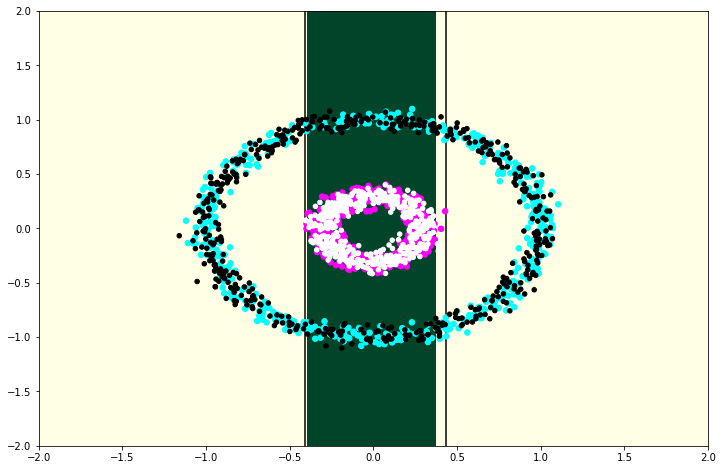

Max. Produndidad = 3
Train Accuracy = 0.944000
Test Accuracy = 0.924000



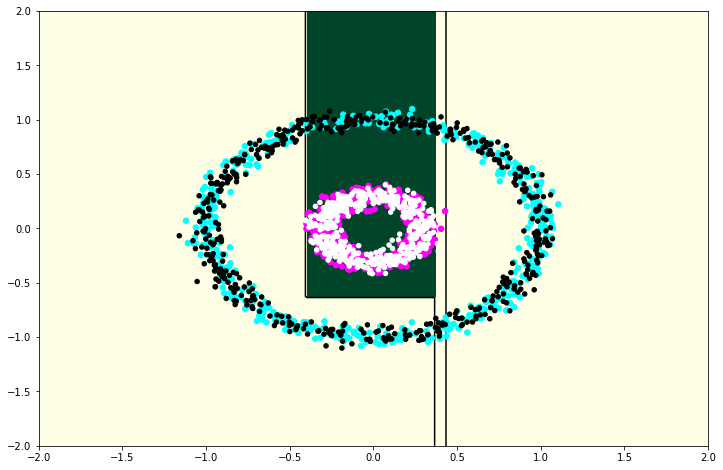

Max. Produndidad = 4
Train Accuracy = 0.999000
Test Accuracy = 0.994000



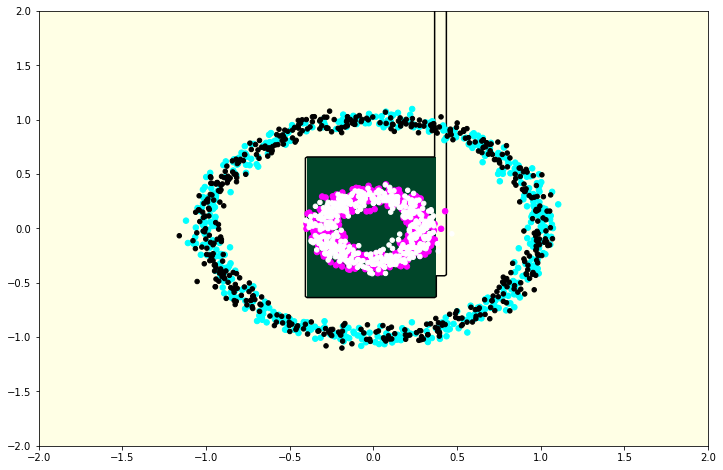

Max. Produndidad = 5
Train Accuracy = 1.000000
Test Accuracy = 0.992000



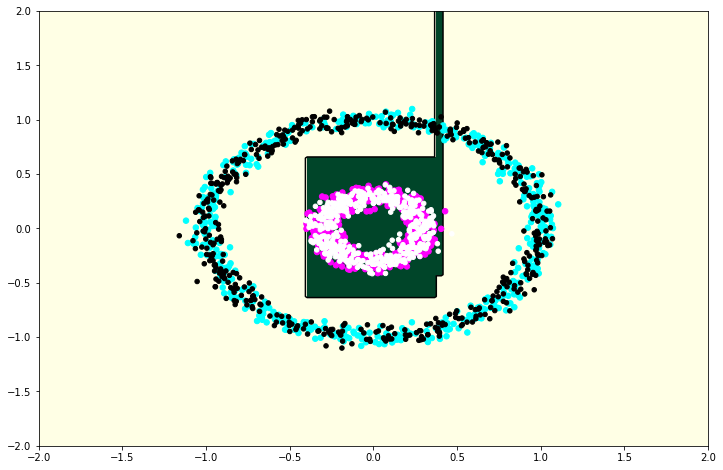

Max. Produndidad = 6
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 7
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 8
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 9
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 10
Train Accuracy = 1.000000
Test Accuracy = 0.992000



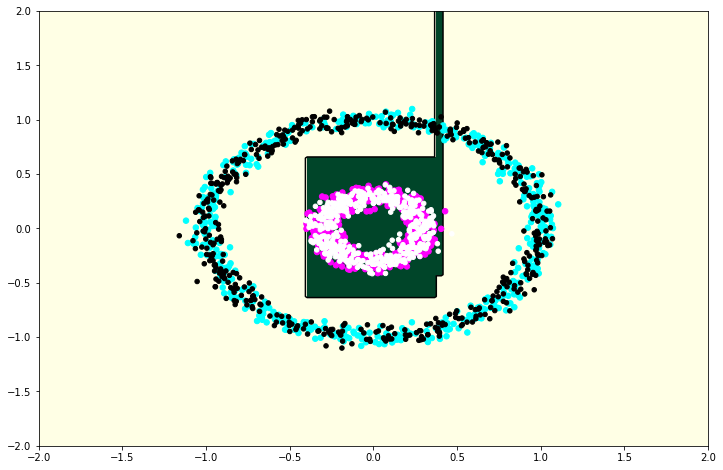

Max. Produndidad = 11
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 12
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 13
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 14
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 15
Train Accuracy = 1.000000
Test Accuracy = 0.992000



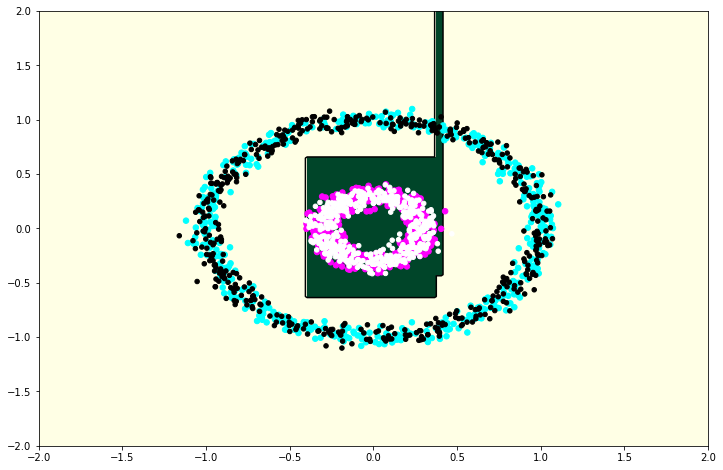

Max. Produndidad = 16
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 17
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 18
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 19
Train Accuracy = 1.000000
Test Accuracy = 0.992000

Max. Produndidad = 20
Train Accuracy = 1.000000
Test Accuracy = 0.992000



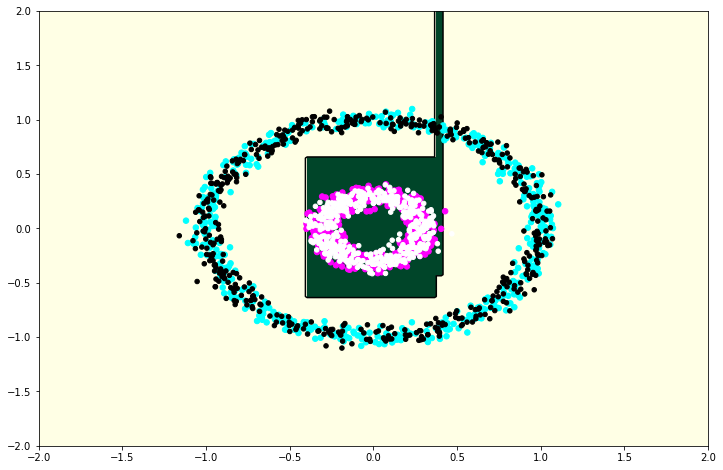

In [125]:
for profundidad in range(2,21):
    clf_1d_3=Tree(criterion='gini',splitter='best',random_state=0,
                  max_depth=profundidad,presort=True)
    clf_1d_3.fit(X_train,y_train)
    acc_train_1d_3 = clf_1d_3.score(X_train, y_train)
    acc_test_1d_3 = clf_1d_3.score(X_test,y_test)

    print ("Max. Produndidad =", profundidad)
    print ("Train Accuracy = %f" % acc_train_1d_3)
    print ("Test Accuracy = %f" % acc_test_1d_3)
    print ()

    if(profundidad < 5 or profundidad%5==0): 
        plot_classifier(clf_1d_3,X_train,y_train,X_test,y_test,'tree')

Cuando se aumenta la profundidad máxima, el árbol logra separar mejor las regiones, ya que puede hacer más *splits*. A partir de `max_depth=4` se alcanza un 99.9% de exactitud de clasificación de datos de entrenamiento y 99.4% en el de prueba, manteniéndose en ese nivel para profundidades mayores. Ya que el modelo logra un rendimiento tan cercano al 100%, se dice que con múltiples niveles, un árbol de clasificación puede resolver satisfactoriamente el problema planteado.

#### (f) Proyección de los datos a un nuevo espacio dimensional (*manifold*) en el cual éstos sean linealmente separables.

In [126]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

Se grafica `Xkpca_train` y `Xkpca_test` coloreados por sus clases.

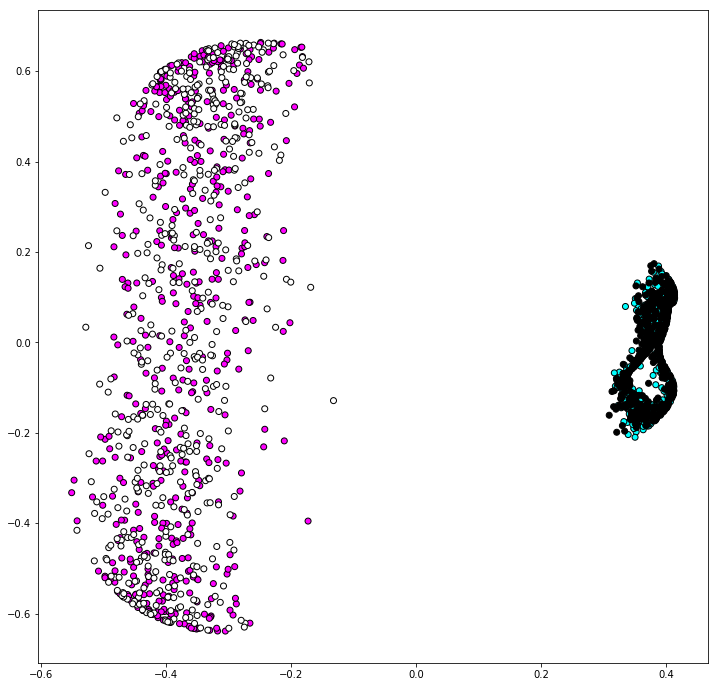

In [131]:
plt.figure(figsize=(12,12))
plt.scatter(Xkpca_train.T[0], Xkpca_train.T[1], c=y_train, cmap='cool', edgecolor='black')
plt.scatter(Xkpca_test.T[0], Xkpca_test.T[1], c=y_test, cmap='gray', edgecolor='black')
plt.show()

Recordar que:

Conjunto de entrenamiento: Magenta (clase 0) y Cian (clase 1)

Conjunto de prueba: Blanco (clase 0) y Negro (clase 1)

Frontera de decisión del modelo: Verde Oscuro (clase 0) y Amarillo Claro (clase 1)

Las clases quedan linealmente separables, quedando a la parte izquierda y bastante dispersos, los puntos correspondiente a la clase 0. A la derecha y bien concentrados, están los puntos de la clase 1.

#### (g) Experimentación con modelos de clasificación lineales sobre los datos proyectados.

Se probará con una neurona unitaria y con un *stump* como los definidos en ítems anteriores.

Primero, se prueba con la neurona.

In [134]:
# Neurona unitaria

n_h=1

modelo_1g = Sequential()
modelo_1g.add(Dense(1, input_dim=Xkpca_train.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_1g.add(Dense(n_h, init='uniform', activation='sigmoid'))
modelo_1g.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
acc_1g = modelo_1g.fit(Xkpca_train,y_train,validation_data=(Xkpca_test,y_test),epochs=50,
                       batch_size=100,verbose=1).history

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s - loss: 0.6933 - acc: 0.4860 - val_loss: 0.6939 - val_acc: 0.4930
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.6930 - acc: 0.4910 - val_loss: 0.6888 - val_acc: 1.0000
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.6719 - acc: 0.6910 - val_loss: 0.6123 - val_acc: 0.8750
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.4712 - acc: 0.9820 - val_loss: 0.2823 - val_acc: 1.0000
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.1946 - acc: 1.0000 - val_loss: 0.1270 - val_acc: 1.0000
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.0979 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 1.0000
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.0622 - acc: 1.0000 - val_loss: 0.0522 - val_acc: 1.0000
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.0448 - a

Se observa una exactitud de clasificación del 100% sobre los conjuntos de entrenamiento y prueba, lo que confirma que el problema logra ser resuelto de forma satisfactoria utilizando un método lineal.

Para corroborar esto, se visualiza la frontera de decisión del modelo, sobre el conjunto de datos proyectados.

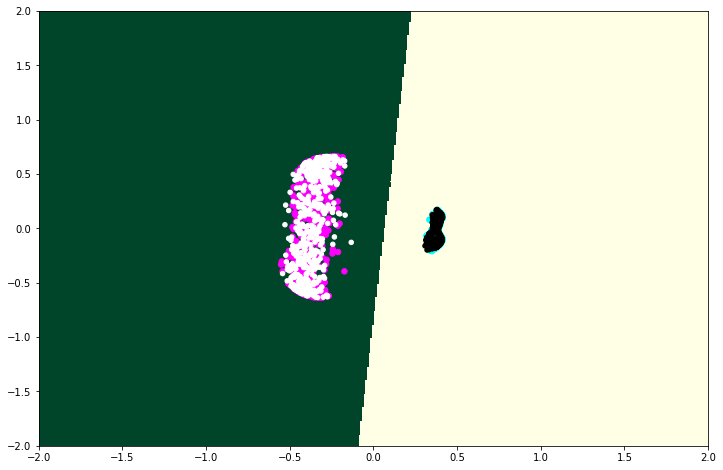

In [135]:
plot_classifier(modelo_1g, Xkpca_train, y_train, Xkpca_test, y_test, 'ann')

Es entonces, evidente que los datos proyectados usando PCA (con kernel gaussiano) resultan ser linealmente separables.

A continuación se comprobará si el *stump* logra el mismo rendimiento.

Test Accuracy = 1.000000
Max. Produndidad = 1


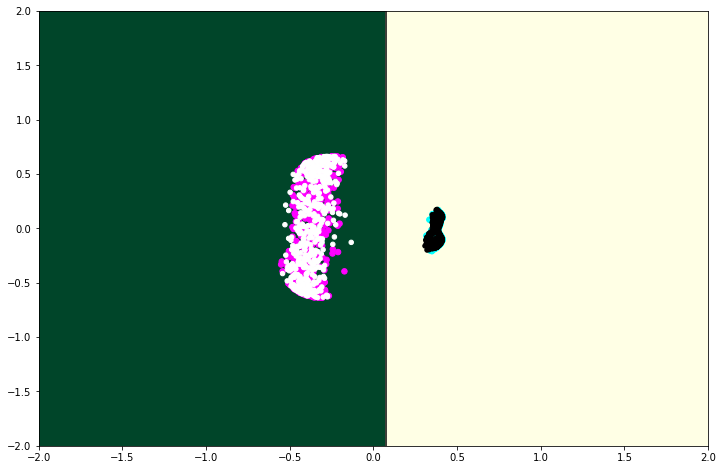

In [136]:
clf_1g=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf_1g.fit(Xkpca_train,y_train)
acc_test_1g = clf_1g.score(Xkpca_test,y_test)

print ("Test Accuracy = %f"%acc_test_1g)
print ("Max. Produndidad =", clf_1g.tree_.max_depth)

plot_classifier(clf_1g,Xkpca_train,y_train,Xkpca_test,y_test,'tree')

En efecto, el rendimiento del *stump* es satisfactorio, con un *accuracy* de pruebas del 100%, por lo que se afirma que el problema queda linealmente separable al aplicar `kernelPCA`.

Proyectar los datos para hacerlos linealmente separables resulta conveniente si no se quiere usar métodos de clasificación complejos, como redes neuronales de múltiples neuronas y/o capas, o árboles de múltiples niveles. También, PCA permite mantener la interpretabilidad de los datos, lo que hace esta técnica más "confiable" en dominios del conocimiento alejados de la informática.

Pero esta técnica también tiene desventajas. La más importante de todas es que cada dato nuevo tiene que se proyectado al nuevo espacio antes de poder ser procesado por el modelo de clasificación en uso. Si la cantidad de datos nuevos es grande, entonces el proceso de proyección resulta menos confiable, pues se creó con menos datos en consideración. Por lo tanto, entre mayor cantidad de datos nuevos (que no estaban al momento de generar la proyección), empieza a ser necesario generar una nueva proyección que los considere a todos. Cuando se genera la nueva proyección, entonces es necesario volver a definir y entrenar el modelo clasificador. En pocas palabras, en presencia de nueva información, no basta con incluirla en el conjunto de entrenamiento y seguir entrenando el modelo para ajustarlo, como ocurriría normalmente; sino que es necesario regenerar la proyección con todos los datos en consideración, y luego redefinir y entrenar desde cero un nuevo modelo.

Entonces, la técnica de proyección no sería la mejor si se llegara a usar en una circunstancia donde constamentemente se reciben grandes volúmenes de información, ya que esto saldría muy caro computacionalmente. En estos escenarios, resultaría mejor utilizar modelos más complejos pero mucho más adaptables al flujo de nueva información.